In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
from plotnine import *
import folium

In [11]:
shop = pd.read_csv('data\store_location\상권(상가)정보_201912_(1)서울,부산.csv',
                   encoding='cp949')
shop.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,"""1168010600106040000014378""",대치상가,서울특별시 강남구 남부순환로 2933,135280,"""06280""",NaN,1,NaN,"""127.061026050567""","""37.4939223326479"""
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,"""1168010100106960042022041""",NaN,서울특별시 강남구 선릉로93길 6,135080,"""06149""",NaN,1,NaN,"""127.047883157395""","""37.505675040058"""
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,"""1154510200101620001017748""",NaN,서울특별시 금천구 가산로 34-6,153010,"""08545""",NaN,1,NaN,"""126.899220370682""","""37.4717112331268"""
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,"""2653010400105780000002037""",산업용품유통상가,부산광역시 사상구 괘감로 37,617726,"""46977""",NaN,1,26,"""128.980455279266""","""35.1597741758499"""
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,"""1171010500102560005010490""",NaN,서울특별시 송파구 가락로 71,138846,"""05690""",NaN,1,NaN,"""127.104070564081""","""37.5002486691845"""


In [12]:
shop.shape

(573680, 39)

# 데이터의 전체적인 정보

In [13]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
상가업소번호       573680 non-null int64
상호명          573679 non-null object
지점명          76674 non-null object
상권업종대분류코드    573680 non-null object
상권업종대분류명     573680 non-null object
상권업종중분류코드    573680 non-null object
상권업종중분류명     573680 non-null object
상권업종소분류코드    573680 non-null object
상권업종소분류명     573680 non-null object
표준산업분류코드     539290 non-null object
표준산업분류명      539290 non-null object
시도코드         573680 non-null int64
시도명          573680 non-null object
시군구코드        573680 non-null int64
시군구명         573680 non-null object
행정동코드        573680 non-null int64
행정동명         573680 non-null object
법정동코드        573680 non-null int64
법정동명         573680 non-null object
지번코드         573680 non-null object
대지구분코드       573680 non-null int64
대지구분명        573680 non-null object
지번본번지        573680 non-null int64
지번부번지        474924 non-null float64
지번주소         573680 non-null obj

In [14]:
shop.isnull().sum()

상가업소번호            0
상호명               1
지점명          497006
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34390
표준산업분류명       34390
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         98756
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        501692
건물관리번호            0
건물명          308072
도로명주소             0
구우편번호             0
신우편번호             9
동정보          522824
층정보          226553
호정보          488414
경도                0
위도                0
dtype: int64

## 서울시 데이터만을 가져오기

In [16]:
seoul = shop.loc[shop['시도명'].str.startswith('서울')].copy()
seoul.shape

(407376, 39)

In [17]:
seoul['상권업종대분류명'].value_counts()

음식          132889
소매          126209
생활서비스        67137
학문/교육        31509
의료           19011
부동산          15701
관광/여가/오락     11643
숙박            3083
스포츠            194
Name: 상권업종대분류명, dtype: int64

In [18]:
seoul.describe(include=np.object)

,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,...,도로명,건물관리번호,건물명,도로명주소,신우편번호,동정보,층정보,호정보,경도,위도
count,407376,57603,407376,407376,407376,407376,407376,407376,382650,382650,...,407376,407376,198765,407376,407374,31791,277609,59063,407376,407376
unique,278702,20788,9,9,94,94,697,697,211,211,...,11994,129310,26607,128427,5565,968,136,2681,133123,133123
top,점프셈교실,강남점,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,...,서울특별시 서초구 신반포로,"""1111016400102700003012054""",동대문종합시장,서울특별시 종로구 종로 266,"""04529""",1,1,1,"""127.007310641055""","""37.5706940376659"""
freq,1788,500,132889,132889,41537,41537,27247,27247,51186,51186,...,3543,1013,1023,1000,1916,5543,179172,6688,1013,1013


In [ ]:
# 상권업종 대분류명에 따른 Barplot

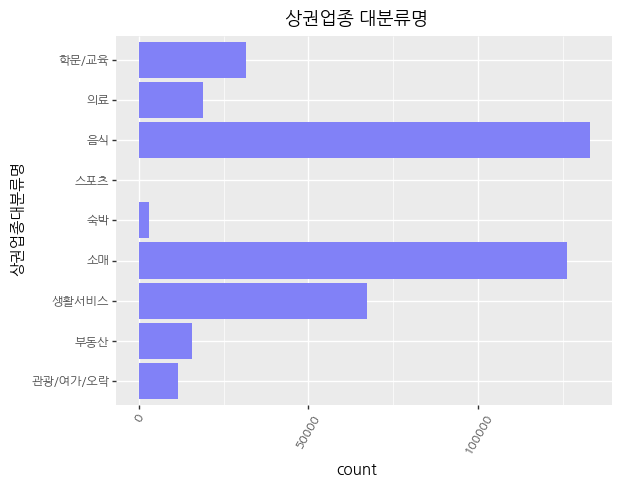

<ggplot: (153412784865)>

In [21]:
(ggplot(seoul)
 + aes('상권업종대분류명')
 + geom_bar(fill='#8181F7')
 + ggtitle('상권업종 대분류명')
 + coord_flip()
 + theme(text = element_text(family='NanumGothic'),
        axis_text_x = element_text(rotation=60))
)

* 식당이 가장 많으며, 그 다음 소매업, 생활서비스 순으로 많은 상권이 있음을 알 수 있다.

## 서울시 음식점에 대한 데이터 분석

In [22]:
seoul_food = seoul.loc[seoul['상권업종대분류명'].str.contains('음식')]
seoul_food.shape

(132889, 39)

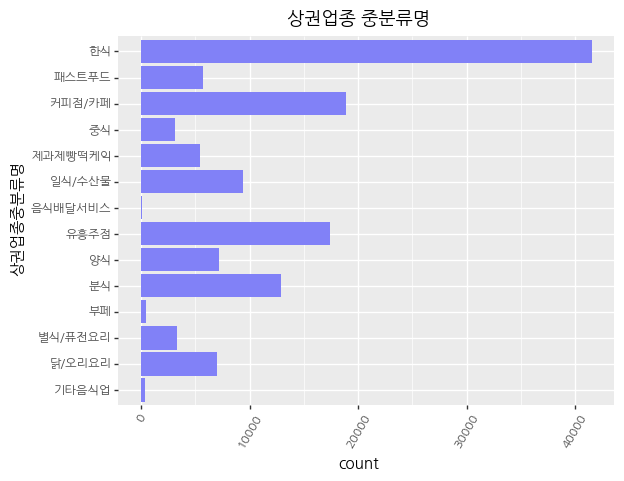

<ggplot: (-9223371883441676733)>

In [24]:
(ggplot(seoul_food)
 + aes('상권업종중분류명')
 + geom_bar(fill='#8181F7')
 + ggtitle('상권업종 중분류명')
 + coord_flip()
 + theme(text = element_text(family='NanumGothic'),
        axis_text_x = element_text(rotation=60))
)

* 한식집이 음식점의 상당수를 차지하고, 그 뒤로 카페, 유흥주점, 분식집 순으로 많다

## 스타벅스와 맥도날드의 입지분석

In [63]:
sb_mac = seoul.loc[seoul['상호명'].str.contains('스타벅스|맥도날드')].copy()
sb_mac.shape

(641, 39)

In [64]:
sb_mac = sb_mac[['상호명', '지점명', '상권업종대분류명', '상권업종중분류명',
               '지번주소', '도로명주소', '위도', '경도', '시군구명', '행정동명']].copy()
sb_mac.columns

Index(['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '지번주소', '도로명주소', '위도', '경도',
       '시군구명', '행정동명'],
      dtype='object')

In [33]:
sb_mac.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,지번주소,도로명주소,위도,경도,시군구명,행정동명
1104,스타벅스,이태원점,음식,커피점/카페,서울특별시 용산구 이태원동 127-6,서울특별시 용산구 이태원로 188,"""37.5343029422413""","""126.994781275664""",용산구,이태원1동
2023,스타벅스종로3가점,종로3가점,음식,커피점/카페,서울특별시 종로구 종로3가 9-3,서울특별시 종로구 종로 113-1,"""37.5705850186896""","""126.990207240455""",종로구,종로1.2.3.4가동
2770,스타벅스,신사2점,음식,커피점/카페,서울특별시 서초구 잠원동 28-1,서울특별시 서초구 강남대로 581,"""37.5136626341355""","""127.019762756075""",서초구,잠원동
14770,스타벅스커피여의도IFC1F,NaN,음식,커피점/카페,서울특별시 영등포구 여의도동 23,서울특별시 영등포구 국제금융로 10,"""37.5251722235016""","""126.924863083917""",영등포구,여의동
14781,스타벅스,삼성역점,음식,커피점/카페,서울특별시 강남구 삼성동 168-26,서울특별시 강남구 테헤란로103길 9,"""37.5100378471739""","""127.063878213052""",강남구,삼성1동


In [35]:
sb_mac['상호명'].value_counts()

스타벅스           302
맥도날드            62
맥도날드서초GS점        2
스타벅스양천향교역        2
스타벅스석촌서호점        1
              ... 
스타벅스사당점          1
스타벅스서강광흥창역점      1
맥도날드송정역점         1
스타벅스중랑구청점        1
스타벅스압구정로데오역      1
Name: 상호명, Length: 277, dtype: int64

* 상호명에는 브랜드명+지점명으로 되어 있으므로 '브랜드명'이라는 value를 만들어 각각의 브랜드명으로 바꿔준다

In [146]:
sb_mac['브랜드명'] = ''

In [147]:
sb_mac.loc[sb_mac['상호명'].str.contains('스타벅스'),'브랜드명'] = '스타벅스'
sb_mac.loc[sb_mac['상호명'].str.contains('맥도날드'), '브랜드명'] = '맥도날드'

In [148]:
sb_mac[['상호명', '브랜드명']]

,상호명,브랜드명
1104,스타벅스,스타벅스
2023,스타벅스종로3가점,스타벅스
2770,스타벅스,스타벅스
14770,스타벅스커피여의도IFC1F,스타벅스
14781,스타벅스,스타벅스
...,...,...
567090,스타벅스,스타벅스
567828,스타벅스,스타벅스
570096,스타벅스,스타벅스
571052,스타벅스,스타벅스


In [136]:
 sb_mac['경도']

1104      "126.994781275664"
2023      "126.990207240455"
2770      "127.019762756075"
14770     "126.924863083917"
14781     "127.063878213052"
                 ...        
567090    "126.952791670408"
567828    "127.015329383298"
570096    "126.956144217185"
571052    "126.911859060314"
571857    "126.983594194964"
Name: 경도, Length: 641, dtype: object

In [142]:
# df['DataFrame Column'] = df['DataFrame Column'].astype(float)
# df['DataFrame Column'] = pd.to_numeric(df['DataFrame Column'],errors='coerce')
x = sb_mac['경도']
sb_mac['경도'] = sb_mac['경도'].map(lambda x : x.replace('"','')).astype(float)

y = sb_mac['위도']
sb_mac['위도'] = sb_mac['위도'].map(lambda x : x.replace('"','')).astype(float)



In [144]:
sb_mac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 1104 to 571857
Data columns (total 10 columns):
상호명         641 non-null object
지점명         581 non-null object
상권업종대분류명    641 non-null object
상권업종중분류명    641 non-null object
지번주소        641 non-null object
도로명주소       641 non-null object
위도          641 non-null float64
경도          641 non-null float64
시군구명        641 non-null object
행정동명        641 non-null object
dtypes: float64(2), object(8)
memory usage: 75.1+ KB


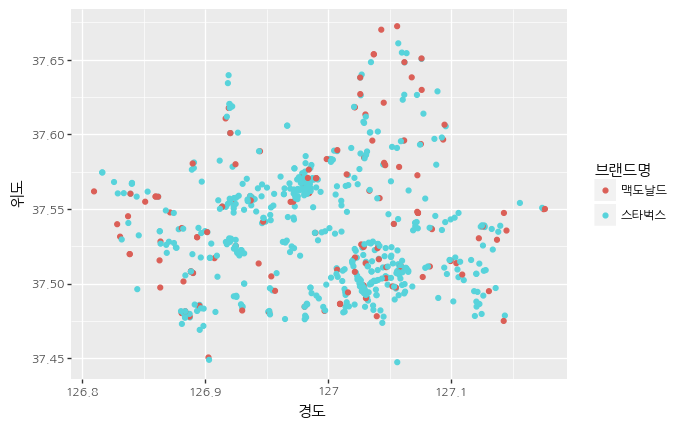

<ggplot: (153428578452)>

In [149]:
(ggplot(sb_mac)
 + aes(x = '경도', y = '위도', color='브랜드명')
 + geom_point()
 + theme(text = element_text(family='NanumGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green')

)

In [150]:
geo_df = sb_mac.copy()

#지도를 초기화 해줄 때 중심의 위치를 설정한다
# 사용자가 가져온 데이터프레임 안에 있는 데이터를 기준으로 출력할 수 있도록 위경도의 평균갑을 구해온다

map = folium.Map(location = [geo_df['위도'].mean(), geo_df['경도'].mean()],
                            zoom_start = 12)

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정 (popup_name)
    popup_name = geo_df['브랜드명'][n] + ' - ' + geo_df['도로명주소'][n]
    
    # 브랜드명에 따라 아이콘 생상을 달리 해 찍어준다(icon_color)
    if geo_df['브랜드명'][n] == '스타벅스' :
        icon_color = 'green'
    else:
        icon_color = 'red'
    
    folium.Marker(
        [geo_df['위도'][n], geo_df['경도'][n]],
        popup = popup_name,
        icon = folium.Icon(color = icon_color)).add_to(map)    
                   
map

In [151]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '브랜드명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'
    else:
        icon_color = 'red'    
      
    # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
    # --> folium.vector_layer.CircleMarker 를 사용합니다.
    folium.CircleMarker(
        location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map